In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import scipy.stats
import scipy.special
import sklearn.linear_model
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier


In [ ]:
data = pd.read_csv('fraud_dectectionscaled.csv')
data = data.drop(columns = 'Unnamed: 0')
data

,Amount,OldbalanceOrg,NewbalanceOrig,OldbalanceDest,NewbalanceDest,Fraud,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Type2_CM
0,9839.64,170136.00,160296.36,0.0,0.00,0.0,0.0,0.0,1.0,0.0,1.0
1,1864.28,21249.00,19384.72,0.0,0.00,0.0,0.0,0.0,1.0,0.0,1.0
2,181.00,181.00,0.00,0.0,0.00,1.0,0.0,0.0,0.0,1.0,0.0
3,181.00,181.00,0.00,21182.0,0.00,1.0,1.0,0.0,0.0,0.0,0.0
4,11668.14,41554.00,29885.86,0.0,0.00,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1007211,6937.38,10135.00,3197.62,0.0,0.00,0.0,0.0,0.0,1.0,0.0,1.0
1007212,195469.53,1578.00,0.00,0.0,195469.53,0.0,1.0,0.0,0.0,0.0,0.0
1007213,11620.30,14763.00,3142.70,0.0,0.00,0.0,0.0,0.0,1.0,0.0,1.0
1007214,5998.54,15867.00,9868.46,0.0,0.00,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
data = data.dropna()
data

,Amount,OldbalanceOrg,NewbalanceOrig,OldbalanceDest,NewbalanceDest,Fraud,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Type2_CM
0,9839.64,170136.0,160296.36,0.0,0.00,0.0,0.0,0.0,1.0,0.0,1.0
1,1864.28,21249.0,19384.72,0.0,0.00,0.0,0.0,0.0,1.0,0.0,1.0
2,181.00,181.0,0.00,0.0,0.00,1.0,0.0,0.0,0.0,1.0,0.0
3,181.00,181.0,0.00,21182.0,0.00,1.0,1.0,0.0,0.0,0.0,0.0
4,11668.14,41554.0,29885.86,0.0,0.00,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1007210,4758.42,100522.0,95763.58,0.0,0.00,0.0,0.0,0.0,1.0,0.0,1.0
1007211,6937.38,10135.0,3197.62,0.0,0.00,0.0,0.0,0.0,1.0,0.0,1.0
1007212,195469.53,1578.0,0.00,0.0,195469.53,0.0,1.0,0.0,0.0,0.0,0.0
1007213,11620.30,14763.0,3142.70,0.0,0.00,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
# Separate input features and target
y = data.Fraud
X = data.drop('Fraud', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(sampling_strategy=1.0,random_state=27)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
col_names=['Amount','OldbalanceOrg','NewbalanceOrig','OldbalanceDest','NewbalanceDest']
features_train = X_train[col_names]
features_test = X_test[col_names]
scaler = StandardScaler().fit(features_train.values)
features_train = scaler.transform(features_train.values)
features_test = scaler.transform(features_test.values)
X_train[col_names] = features_train
X_test[col_names] =features_test

In [ ]:
y

0          0.0
1          0.0
2          1.0
3          1.0
4          0.0
          ... 
1007210    0.0
1007211    0.0
1007212    0.0
1007213    0.0
1007214    0.0
Name: Fraud, Length: 1007215, dtype: float64

In [ ]:
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# Checking accuracy
print(accuracy_score(y_test, smote_pred))
   
    

# f1 score
print(f1_score(y_test, smote_pred))
   
    
print(recall_score(y_test, smote_pred))
   

0.9267168114883004
0.014315474600715774
0.9571428571428572


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,smote_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    251664
         1.0       0.01      0.96      0.01       140

    accuracy                           0.93    251804
   macro avg       0.50      0.94      0.49    251804
weighted avg       1.00      0.93      0.96    251804



In [ ]:
cm = confusion_matrix(y_test,smote_pred)
cm

array([[233217,  18447],
       [     6,    134]])

Text(69.0, 0.5, 'Fraud')

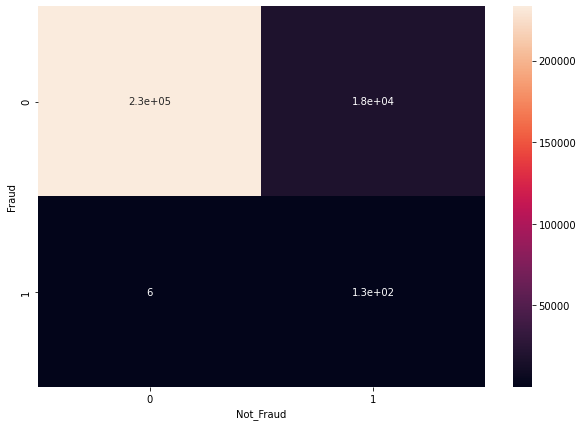

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Not_Fraud')
plt.ylabel('Fraud')

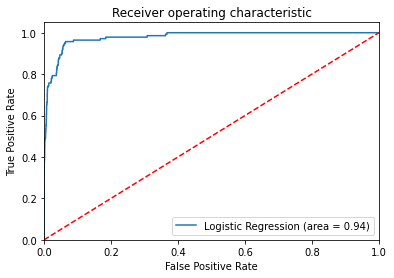

In [ ]:
# roc curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, smote.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, smote.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


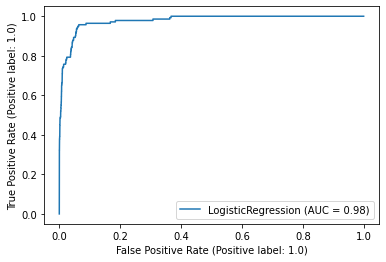

In [ ]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(smote,X_test,y_test);

In [ ]:
xgb_model = XGBClassifier().fit(X_train, y_train)

# predict
xgb_y_predict = xgb_model.predict(X_test)

# accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)

print('Accuracy score is:', xgb_score)
print('ROCAUC score:',roc_auc_score(y_test, xgb_y_predict))
print('F1 score:',f1_score(y_test,xgb_y_predict ))


Accuracy score is: 0.966557322361837
ROCAUC score: 0.9725610337592981
F1 score: 0.031512363427257044


In [ ]:
# load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, y_train)

svc_predict = svc_model.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))